In [1]:
import pandas as pd  # библиотека для работы с БД
import matplotlib.pyplot as plt  # библиотека для работы визулизацией данных
import seaborn as sns  # библиотека для работы визулизацией данных
from sklearn.model_selection import train_test_split  # Библиотека ML для валидации
# для уменьшения размерности, улучшения предсказательной силы модуля
from sklearn.feature_selection import f_classif, mutual_info_classif
# отобразить каждое значение категории в уникальное число.
# cамый простой способ — отобразить каждое значение категории в уникальное число
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np  # Для математического вычисления
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')  # Загружаем БД
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [3]:
df.info()  # Информация о каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


<AxesSubplot:>

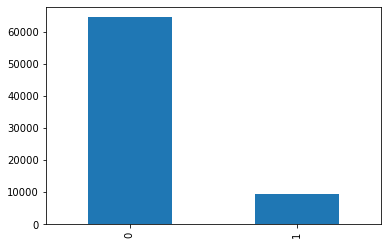

In [4]:
# Кол-во людей с дефолтом и без
df.default.value_counts().plot.bar()

__Как мы видем на графике людей без дефолта на много больше,чем с ним.__

# Построим графики распределения логарифмированных переменных для численных переменных.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


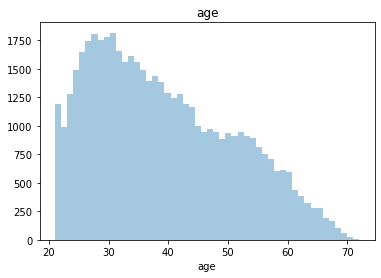

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


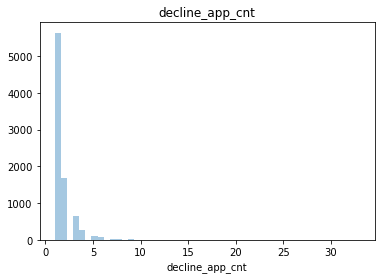

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


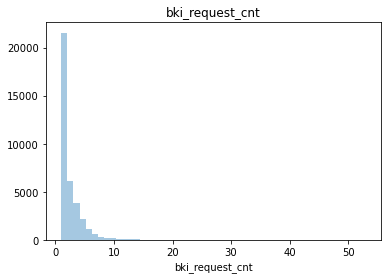

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


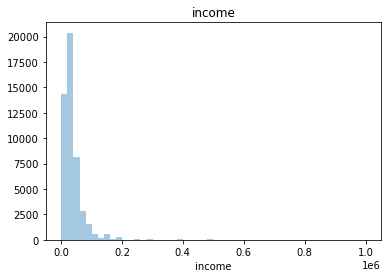

In [5]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

# числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

data = pd.read_csv('train.csv')
train, validation = train_test_split(data, test_size=0.33, random_state=42)

for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde=False, rug=False)
    plt.title(i)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


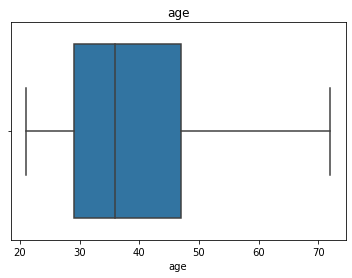

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


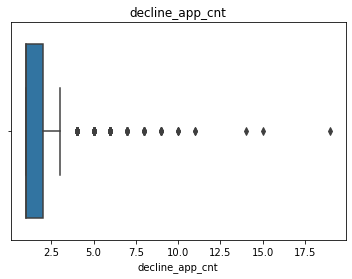

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


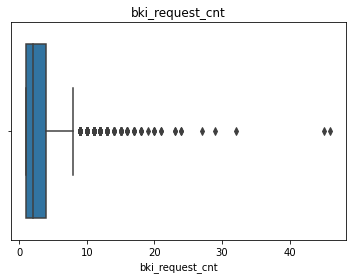

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


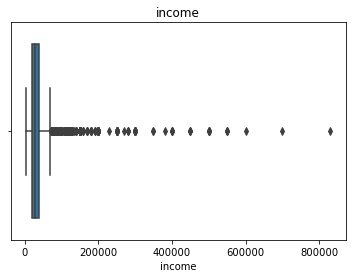

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Средний возраст дефолтного клиента: 38.47
Средний показатель отмененных заявок дефолтного клиента: 0.53
Средний показатель БКИ дефолтного клиента: 2.48
Средний доход дефолтного клиента: 36486.67


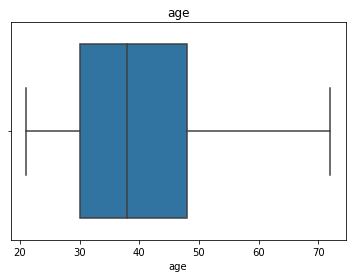

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


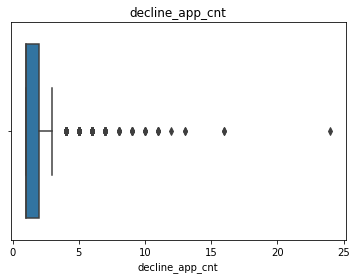

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


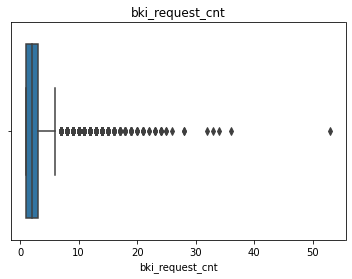

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


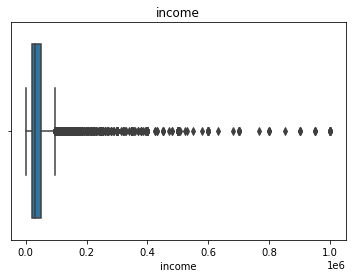

Средний возраст не дефолтного клиента: 39.43
Средний показатель отмененных заявок не дефолтного клиента: 0.24
Средний показатель БКИ не дефолтного клиента: 1.94
Средний доход не дефолтного клиента: 41698.44


In [6]:
data = pd.read_csv('train.csv')
default_1 = data[data.default == 1]
default_0 = data[data.default == 0]
default_1, validation = train_test_split(
    default_1, test_size=0.33, random_state=42)
default_0, validation = train_test_split(
    default_0, test_size=0.33, random_state=42)
for i in num_cols:
    plt.figure()
    sns.boxplot(default_1[i][default_1[i] > 0].dropna())
    plt.title(i)
    plt.show()
print('Средний возраст дефолтного клиента: {:.2f}'.format(
    default_1['age'].mean()))
print('Средний показатель отмененных заявок дефолтного клиента: {:.2f}'.format(
    default_1['decline_app_cnt'].mean()))
print('Средний показатель БКИ дефолтного клиента: {:.2f}'.format(
    default_1['bki_request_cnt'].mean()))
print('Средний доход дефолтного клиента: {:.2f}'.format(
    default_1['income'].mean()))
for i in num_cols:
    plt.figure()
    sns.boxplot(default_0[i][default_0[i] > 0].dropna())
    plt.title(i)
    plt.show()
print('Средний возраст не дефолтного клиента: {:.2f}'.format(
    default_0['age'].mean()))
print('Средний показатель отмененных заявок не дефолтного клиента: {:.2f}'.format(
    default_0['decline_app_cnt'].mean()))
print('Средний показатель БКИ не дефолтного клиента: {:.2f}'.format(
    default_0['bki_request_cnt'].mean()))
print('Средний доход не дефолтного клиента: {:.2f}'.format(
    default_0['income'].mean()))

# Оценка корреляций

<AxesSubplot:>

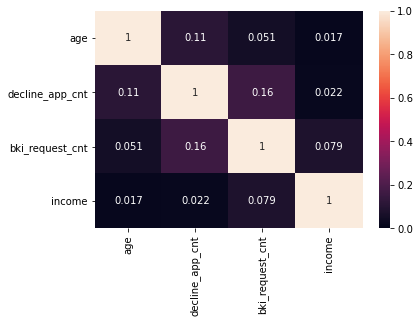

In [7]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

__Делая вывод можно сказать,что большая корреляция находится между запросом по БКИ и доходом('bki_request_cnt', 'income').Что говорит о линейной корреляции этих признаков.__

# Значимость непрерывных переменных

<AxesSubplot:>

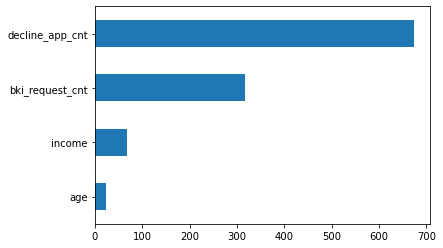

In [8]:
data = pd.read_csv('train.csv')
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[
                    0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

# Категориальные переменные

In [9]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [10]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
for column in cat_cols:
    train[column] = label_encoder.fit_transform(train[column])

# убедимся в преобразовании
train.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
8931,104346,1,0,27,0,0,0,0,3,1,2,30000,0,0
63915,56248,1,0,47,0,0,0,0,4,0,1,20000,0,0
45568,59433,3,0,47,0,0,0,0,0,1,2,45000,0,0
3391,21096,3,0,32,0,0,0,0,3,1,2,21000,0,1
40660,18878,3,0,31,0,0,0,1,6,1,2,30000,1,0


_ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ_

<AxesSubplot:>

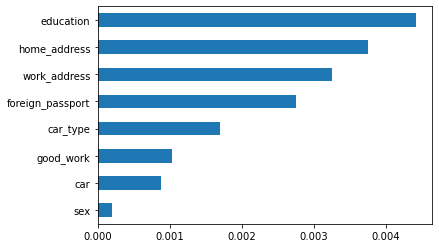

In [11]:
imp_cat = pd.Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                        discrete_features=True), index=bin_cols + cat_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

In [12]:
imp_cat

sex                 0.000196
car                 0.000883
good_work           0.001031
car_type            0.001698
foreign_passport    0.002759
work_address        0.003257
home_address        0.003755
education           0.004428
dtype: float64

# Подготовка данных к машинному обучению

In [13]:
X_cat = OneHotEncoder(sparse=False).fit_transform(train[cat_cols].values)
X_cat

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
len(X_cat[0])  # Кол-во столбцов после преобразования

12

In [15]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(train[num_cols].values)

In [16]:
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

In [17]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
for column in cat_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [18]:
X_train, X_validation = train_test_split(
    data, test_size=0.33, random_state=42)  # Валидация

In [19]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_validation)

# Оценка качества модели

__Матрица ошибок__

In [20]:
#confusion_matrix(df['default'].values,y_pred)